In [12]:
%matplotlib inline
from __future__ import print_function, division
path = "data/baidu/"
#path = "data/state/sample/"
import utils; reload(utils)
from utils import *
from IPython.display import FileLink

In [2]:
train_path = 'data/baidu/image_contest_level_2_train/'
label_exp_count = load_array('data/baidu/label_exp_num.data')

In [13]:
??SeparableConv2D

In [3]:
label_exp_files = []
for i, cnthttp://jp.hangdl.com:4480/notebooks/workspace/baid_level2.ipynb# in enumerate(label_exp_count):
    for c in range(cnt):
        label_exp_files.append('{}-{}-{}.png'.format(i, cnt-c, cnt))

### 划分数据集

In [4]:
idxs = np.random.permutation(len(label_exp_files))
mask = np.random.rand(len(label_exp_files)) < 0.9
trn_idxs = idxs[mask]
val_idxs = idxs[~mask]

In [5]:
len(trn_idxs), len(val_idxs)

(239380, 26427)

圳=86


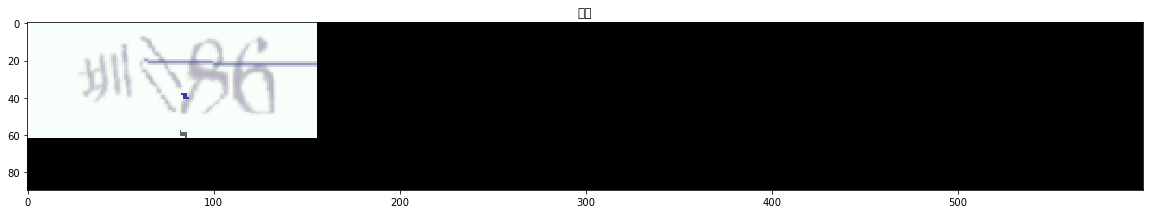

In [11]:
show_img_exp(1)

In [10]:
def show_img_exp(idx):
    print(exp_labels[idx])
    img = image.load_img(train_path+label_exp_files[idx])
    f=plt.figure(figsize=(20,20), frameon=True)
    plt.title(u'出差')
    plt.imshow(img)

In [6]:
label_path = 'data/baidu/level2_labels.txt'
raw_label_list = []
with open(label_path) as f:
    raw_label_list = f.readlines()
raw_label_list = [x.strip() for x in raw_label_list]
label_exp_num_length= []
exp_labels = []
exp_lens =[]
for line in raw_label_list:
    parts = line.split(' ')
    exprs = parts[0]
    result = parts[1]
    label_exp_num_length.append(len(exprs.split(';')))
    for exp in exprs.split(';'):
        exp_labels.append(exp.decode('utf8'))
        exp_lens.append(len(exp.decode('utf8')))

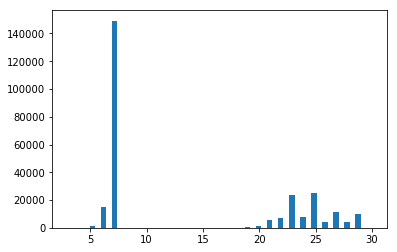

In [8]:
plt.hist(exp_lens, bins='auto')  # arguments are passed to np.histogram
plt.show()

In [9]:
l = np.where(np.array(exp_lens) == 30)[0][0]
print(exp_labels[l])

((36087*79420)+河/25196)-100000


In [10]:
token_counts = {}
for exp in exp_labels:
    for c in exp:
        if c in token_counts:
            token_counts[c] += 1
        else:
            token_counts[c] = 1

In [11]:
tokens = sorted(token_counts.keys()) + ['N']

In [12]:
token_idxs = dict()
for i,token in enumerate(tokens):
    token_idxs[token] = i

In [13]:
actual_labels = []
label_length = 30
for exp in exp_labels:
    a = np.full(label_length, len(tokens)-1)
    for i, token in enumerate(exp):
        a[i] = token_idxs[token]
    actual_labels.append(a)

In [14]:
def to_pretty_label(label):
    s =''
    for token in label:
        if token != len(tokens)-1:
             s = s+tokens[token]
    return s

In [15]:
print(to_pretty_label(actual_labels[-1]))
print(exp_labels[-1])

(98319*上/60469+68041)*塘
(98319*上/60469+68041)*塘


In [46]:
import cv2
def fetch_img_by_idxs(idxs):
    imgs = []
    for f in np.array(label_exp_files)[idxs]:
        img = cv2.imread(train_path+f)
        img = cv2.resize(img, (300, 45), interpolation = cv2.INTER_LINEAR)
        img = np.transpose(np.asarray(img), (2, 0, 1))
        imgs.append(img)
    return np.array(imgs)

In [127]:
def data_generator(idxs, batch_size, shuffle=True):
    if shuffle:  idxs = np.random.permutation(idxs)
    cur = 0
    idxs_len = len(idxs)
    while True:
        out = []
        next_cur = cur + batch_size
        if next_cur < idxs_len:
            out = idxs[cur: next_cur]
            cur = next_cur
        else:
            exceed = next_cur - idxs_len
            out = idxs[cur: idxs_len]
            if shuffle:  idxs = np.random.permutation(idxs)
            out = np.concatenate([out, idxs[0: exceed]]) 
            cur = exceed
        yield fetch_img_by_idxs(out), np.expand_dims(np.asarray(actual_labels)[out], axis=-1)

In [38]:
trn_imgs, trn_labels = next(dg)
for i in range(len(trn_imgs)):
    print(to_pretty_label(trn_labels[i]))
    f=plt.figure(figsize=(20,20), frameon=True)
    #plt.title(title)
    #plt.imshow(trn_imgs[i])

(28726-2940-89493)*来/83756
铁=67650
51188-72965-(77188-回/34427)
(铁-见/11724)+86577+92414
铁=3350
复=34295
((柳+52173)-87638)+复/24941
不/49735-(柳*92254-7109)
板*(67983-(回/15675-51849))
上=62303
黄=63401
(12010-海/93703)-(54695*烟)
深=60178
复=41794
(84530-21215)*(80946*见/4402)
42676*68633+之/77343-圳
黄/7447-铁*44075*13817
43212-(黄/2227-(烧-8053))
奔=6629
锁=44270


In [ ]:
## 93%
def get_model_v1():
    return Sequential([
           BatchNormalization(axis=1, input_shape=(3, 45, 300)),
            
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),
        
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),
        
            Convolution2D(128,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(128,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),

            Flatten(),
            BatchNormalization(),

            Dense(label_length*10, activation='relu'),
            BatchNormalization(),

            Dense(label_length*10, activation='relu'),
            BatchNormalization(),
        
            Reshape((label_length, 10)),
            TimeDistributed(Dense(len(tokens), activation='softmax'))
        ])

In [159]:
## 76%
def get_model_a1():
    return Sequential([
           BatchNormalization(axis=1, input_shape=(3, 45, 300)),
            
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),
        
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),
        
            Flatten(),
            BatchNormalization(),

            Dense(label_length*10, activation='relu'),
            BatchNormalization(),
        
            Reshape((label_length, 10)),
            TimeDistributed(Dense(len(tokens), activation='softmax'))
        ])

In [ ]:
## 91%
def get_model_a2():
    return Sequential([
           BatchNormalization(axis=1, input_shape=(3, 45, 300)),
            
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),
        
            Convolution2D(128,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(128,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),
        
            Convolution2D(256,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(256,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),
        
            Flatten(),
            BatchNormalization(),

            Dense(label_length*10, activation='relu'),
            BatchNormalization(),
        
            Dense(label_length*10, activation='relu'),
            BatchNormalization(),
        
            Reshape((label_length, 10)),
            TimeDistributed(Dense(len(tokens), activation='softmax'))
        ])

In [153]:
## 78%
def get_model_v2():
    return Sequential([
           BatchNormalization(axis=1, input_shape=(3, 45, 300)),
            
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),
        
            Convolution2D(128,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),
        
            Convolution2D(256,3,3, activation='relu'),
            BatchNormalization(axis=1),
            Convolution2D(256,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D(),

            Flatten(),
            BatchNormalization(),

            Dense(label_length*10, activation='relu'),
            BatchNormalization(),

            Dense(label_length*10, activation='relu'),
            BatchNormalization(),
        
            Reshape((label_length, 10)),
            TimeDistributed(Dense(len(tokens), activation='softmax'))
        ])

In [155]:
model = get_model_v2()
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_156 (BatchNor (None, 3, 45, 300)    12          batchnormalization_input_21[0][0]
____________________________________________________________________________________________________
convolution2d_77 (Convolution2D) (None, 64, 43, 298)   1792        batchnormalization_156[0][0]     
____________________________________________________________________________________________________
batchnormalization_157 (BatchNor (None, 64, 43, 298)   256         convolution2d_77[0][0]           
____________________________________________________________________________________________________
maxpooling2d_40 (MaxPooling2D)   (None, 64, 21, 149)   0           batchnormalization_157[0][0]     
___________________________________________________________________________________________

In [136]:
batches = data_generator(trn_idxs, len(trn_idxs), shuffle=False)
imgs, labels = next(batches)
save_array('data/baidu/trn_imgs.dat', imgs)
save_array('data/baidu/trn_labels.dat', labels)

In [ ]:
trn_imgs = load_array('data/baidu/trn_imgs.dat')
trn_labels = load_array('data/baidu/trn_labels.dat')

In [143]:
#这里做数据增强 
da = image.ImageDataGenerator(zoom_range=0.05, shear_range=0.05, channel_shift_range=20,
                             rotation_range=5, height_shift_range=0.03, width_shift_range=0.03)
trn_batches = da.flow(trn_imgs, trn_labels, batch_size=64, shuffle=True)

In [151]:
model.save_weights('v1.wgt')


In [160]:
def train_model(model):
    model.summary()
    
    model.compile(Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit_generator(trn_batches, len(trn_imgs), nb_epoch=1, 
                        validation_data=data_generator(val_idxs, 256, shuffle=False), nb_val_samples=len(val_idxs))
    
    model.optimizer.lr = 0.1
    model.fit_generator(trn_batches, len(trn_imgs), nb_epoch=1, 
                    validation_data=data_generator(val_idxs, 256, shuffle=False), nb_val_samples=len(val_idxs))
    
    model.optimizer.lr = 0.01
    model.fit_generator(trn_batches, len(trn_imgs), nb_epoch=10, 
                    validation_data=data_generator(val_idxs, 256, shuffle=False), nb_val_samples=len(val_idxs))
    
    model.optimizer.lr = 0.001
    model.fit_generator(trn_batches, len(trn_imgs), nb_epoch=10, 
                    validation_data=data_generator(val_idxs, 256, shuffle=False), nb_val_samples=len(val_idxs))
    
    model.optimizer.lr = 0.0001
    model.fit_generator(trn_batches, len(trn_imgs), nb_epoch=10, 
                    validation_data=data_generator(val_idxs, 256, shuffle=False), nb_val_samples=len(val_idxs))

In [161]:
train_model(get_model_a1())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_164 (BatchNor (None, 3, 45, 300)    12          batchnormalization_input_22[0][0]
____________________________________________________________________________________________________
convolution2d_81 (Convolution2D) (None, 32, 43, 298)   896         batchnormalization_164[0][0]     
____________________________________________________________________________________________________
batchnormalization_165 (BatchNor (None, 32, 43, 298)   128         convolution2d_81[0][0]           
____________________________________________________________________________________________________
convolution2d_82 (Convolution2D) (None, 32, 41, 296)   9248        batchnormalization_165[0][0]     
___________________________________________________________________________________________

INFO (theano.gof.compilelock): Refreshing lock /home/viiv/.theano/compiledir_Linux-4.8--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.13-64/lock_dir/lock


Epoch 1/1
239380/239380 [==============================] - 518s - loss: 1.2218 - acc: 0.6324 - val_loss: 1.0103 - val_acc: 0.6633
Epoch 1/1
239380/239380 [==============================] - 514s - loss: 0.9552 - acc: 0.6759 - val_loss: 0.8678 - val_acc: 0.7016
Epoch 1/10
239380/239380 [==============================] - 518s - loss: 0.8603 - acc: 0.7075 - val_loss: 0.8282 - val_acc: 0.7207
Epoch 2/10
239380/239380 [==============================] - 510s - loss: 0.7900 - acc: 0.7339 - val_loss: 0.7732 - val_acc: 0.7408
Epoch 3/10
239380/239380 [==============================] - 513s - loss: 0.7478 - acc: 0.7497 - val_loss: 0.8115 - val_acc: 0.7467
Epoch 4/10
239380/239380 [==============================] - 516s - loss: 0.7190 - acc: 0.7619 - val_loss: 0.8421 - val_acc: 0.7368
Epoch 5/10
 64896/239380 [=======>......................] - ETA: 343s - loss: 0.7064 - acc: 0.7671

KeyboardInterrupt: 

In [ ]:
train_model(get_model_v2())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_171 (BatchNor (None, 3, 45, 300)    12          batchnormalization_input_23[0][0]
____________________________________________________________________________________________________
convolution2d_85 (Convolution2D) (None, 64, 43, 298)   1792        batchnormalization_171[0][0]     
____________________________________________________________________________________________________
batchnormalization_172 (BatchNor (None, 64, 43, 298)   256         convolution2d_85[0][0]           
____________________________________________________________________________________________________
maxpooling2d_45 (MaxPooling2D)   (None, 64, 21, 149)   0           batchnormalization_172[0][0]     
___________________________________________________________________________________________

239380/239380 [==============================] - 520s - loss: 0.3011 - acc: 0.8995 - val_loss: 0.2511 - val_acc: 0.9168
